## Notebook de demonstração para o módulo aproximação

In [4]:
#Bloco de configuração para importar o módulo de um diretório pai
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [ ]:
from CB2325NumericaG07.aproximacao import ajuste_polinomial

Função Polinomial Aproximadora 0.0035714285714284*x**2 + 0.733571428571429*x + 2.15


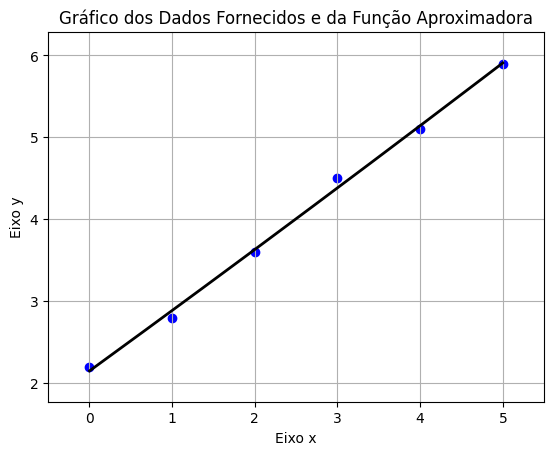

In [6]:
ajuste_polinomial([0, 1, 2, 3, 4, 5], [2.2, 2.8, 3.6, 4.5, 5.1, 5.9], 2)